In [1]:
cd ../src

/Users/dani/Google Drive/Uni/Master/P4 2021/DD2424 - Deep Learning for Data Science/Project/ScarceClassifier/src


In [2]:
from d07_visualization.viz_training import plot_acc, plot_training_loss, plot_losses
from d04_mixmatch.wideresnet import WideResNet
from d02_data.load_data import get_dataloaders_ssl
from d07_visualization.visualize_cifar10 import show_img
from d02_data.load_data_idxs import get_dataloaders_with_index
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_loader, unlbl_loader, val_loader, test_loader, _, _, _ = get_dataloaders_ssl(path='../data', batch_size=64, num_labeled=45000, which_dataset='cifar10')

Files already downloaded and verified
Files already downloaded and verified


In [32]:
file_name = 'pseudo_matrix_balanced165000_all.pt'
#file_name = 'pseudo_matrix_90000.pt'
matrix_original = torch.load(f'../models/pseudo_250/{file_name}', map_location=torch.device('cpu')) 

In [33]:
matrix_original.shape

torch.Size([44750, 5])

In [34]:
# matrix columns: [index, confidence, pseudo_label, true_label, is_ground_truth]
matrix_original[0,:]


tensor([358.0000,   0.7735,   2.0000,   2.0000,   1.0000])

In [40]:
# Select a threshold
tau = 0.99
matrix = matrix_original[matrix_original[:,1] >= tau, :]
minimum_confidence = torch.min(matrix[:,1]).item()

pseudo_labels = matrix[:,2].numpy()
correct_labels = matrix[matrix[:,4] == 1, 2].numpy()
incorrect_labels = matrix[matrix[:,4] == 0, 2].numpy()
distr_labels = []
distr_correct_labels = []
distr_incorrect_labels = []
for i in range(10):
    distr_labels.append(np.sum(pseudo_labels == i))
    distr_correct_labels.append(np.sum(correct_labels == i))
    distr_incorrect_labels.append(np.sum(incorrect_labels == i))

correct = np.sum(distr_correct_labels)
incorrect = np.sum(distr_incorrect_labels)
print('Minimum confidence: %.2f' % (minimum_confidence))
print('Correct: %.2f' % (correct))
print('Incorrect: %.2f' % (incorrect))
print('Pseudo-label accuracy: %.2f' % (correct / (incorrect + correct)*100))


Minimum confidence: 0.99
Correct: 205.00
Incorrect: 23.00
Pseudo-label accuracy: 89.91


In [41]:
torch.quantile(matrix_original[:,1], 0)

tensor(0.1902)

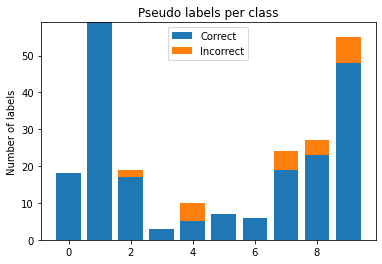

In [42]:
fig, ax = plt.subplots()

ax.bar(range(10), distr_correct_labels, label='Correct')
ax.bar(range(10), distr_incorrect_labels, bottom=distr_correct_labels, label='Incorrect')

ax.set_ylabel('Number of labels')
ax.set_title('Pseudo labels per class')
ax.legend()

plt.show()

In [43]:
print(matrix[matrix[:,2] == 3, 0])
print(matrix[matrix[:,2] == 3, 3])

tensor([10454., 10814., 15444.])
tensor([3., 3., 3.])


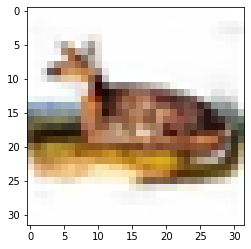

In [39]:
plt.imshow(train_loader.dataset.data[18011])

In [28]:
tau = 0
matrix = matrix_original[matrix_original[:,1] >= tau, :]
minimum_confidence = torch.min(matrix[:,1]).item()

matrix = matrix.numpy()
pseudo_labels = matrix[:,2]
correct_matrix = matrix[matrix[:,4] == 1, :]
incorrect_matrix = matrix[matrix[:,4] == 0, :]

print('Minimum confidence: %.2f' % (minimum_confidence))

Minimum confidence: 0.99


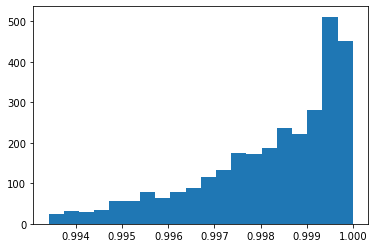

In [29]:
plt.hist(matrix[:,1], bins=20, density=True);

Confidence on the guessed label does have a correlation with correctness. But not too strong to be used for pseudo labelling

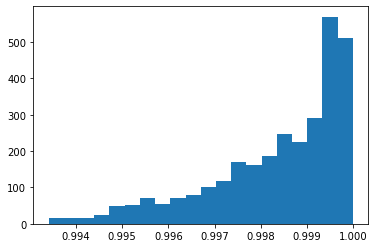

In [30]:
plt.hist(correct_matrix[:,1], bins=20, density=True);

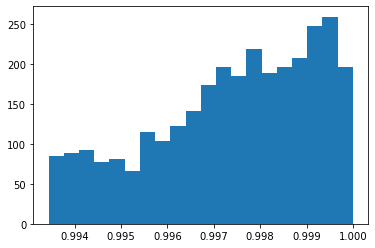

In [31]:
plt.hist(incorrect_matrix[:,1], bins=20, density=True);